# 1.GIỚI THIỆU VỀ BỘ DATA


**Dữ liệu được chia thành hai nhóm :**

   * Bộ huấn luyện (train.csv)

   * Bộ kiểm tra (test.csv)

-Bộ huấn luyện được dùng để xây dựng mô hình Machine Learning.
Trong bộ huấn luyện, kết quả thực tế (ground truth) của mỗi hành khách đã được cung cấp. Mô hình của bạn sẽ dựa trên các đặc trưng (features) như giới tính, hạng vé của hành khách,…

-Bộ kiểm tra được dùng để đánh giá hiệu suất của mô hình trên dữ liệu chưa từng thấy. Trong bộ kiểm tra, kết quả sống sót không được cung cấp. Nhiệm vụ của bạn là dự đoán khả năng sống sót của từng hành khách trong bộ kiểm tra.

-Ngoài ra, còn có tệp gender_submission.csv — đây là một ví dụ về tệp nộp kết quả, trong đó giả định rằng tất cả hành khách nữ đều sống sót, còn tất cả hành khách nam đều không sống sót.

**Data Dictionary:**
Biến -> Định nghĩa -> Ghi chú

survival -> Tình trạng sống sót -> 0 = Không sống sót, 1 = Sống sót

pclass -> Hạng vé -> 1 = Hạng nhất, 2 = Hạng hai, 3 = Hạng ba

sex ->Giới tính

age -> Tuổi (tính theo năm)

sibsp -> Số anh/chị/em ruột hoặc vợ/chồng đi cùng

parch -> Số cha/mẹ hoặc con cái đi cùng

ticket -> Số vé

fare -> Giá vé

cabin -> Số phòng/cabin

embarked -> Cảng lên tàu -> C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(train_df.shape)

(891, 12)


Bộ dữ liệu tập train có 891 dòng và 12 cột. 891 dòng tượng trưng cho 891 hành khách và 12 cột sẽ tượng trưng cho 12 đặc trưng có trong dữ liệu.

In [4]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Thông tin về bộ dữ liệu cho thấy có 5 cột có kiểu dữ liệu là int(số nguyên) đó là "PassengerID"; "Survived"; "Pclass"; "SibSp"; "Parch". Có 5 cột có kiểu dữ liệu là object(đối tượng) là "Name"; "Sex"; "Ticket"; "Cabin"; "Embarked". Và cuối cùng có 2 cột là kiểu dữ liệu float(số thực) là "Age"; "Fare". Ta thấy số tuổi là số thực có thể cần xử lý lại những giá trị trong cột này. Ngoài ra có nhiều cột có giá trị thiếu như "Age"; "Cabin"; "Embarked".

# 2.KHAI PHÁ DỮ LIỆU

## 2.1. Kiểm tra giá trị trùng

In [5]:
train_df.duplicated().sum()

np.int64(0)

In [6]:
train_df[train_df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Kết quả cho thấy không có giá trị trùng trong bộ dữ liệu


## 2.2. Kiểm tra giá trị thiếu

In [7]:
train_df.isnull().sum().any()
train_df.isna().sum().any()

np.True_

In [8]:
train_df.isnull().sum()
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

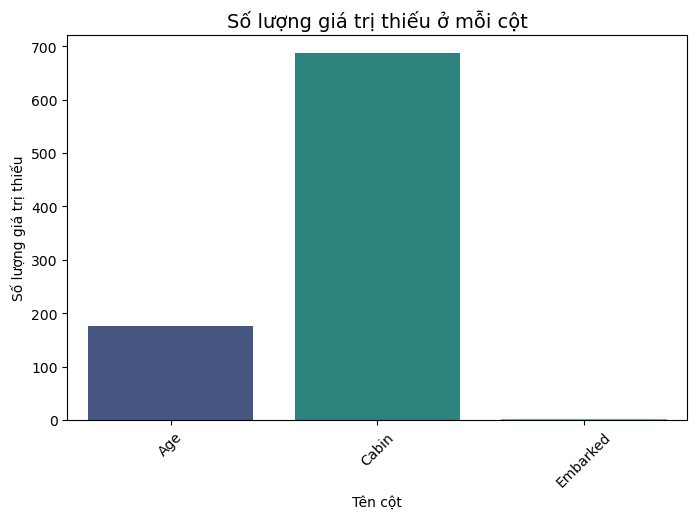

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính tổng số giá trị thiếu
missing_values = train_df.isnull().sum()

# Chỉ lấy các cột có giá trị thiếu > 0
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(8, 5))
sns.barplot(
    x=missing_values.index, 
    y=missing_values.values, 
    hue=missing_values.index, 
    legend=False, 
    palette="viridis"
)

plt.title("Số lượng giá trị thiếu ở mỗi cột", fontsize=14)
plt.xlabel("Tên cột")
plt.ylabel("Số lượng giá trị thiếu")
plt.xticks(rotation=45)
plt.show()

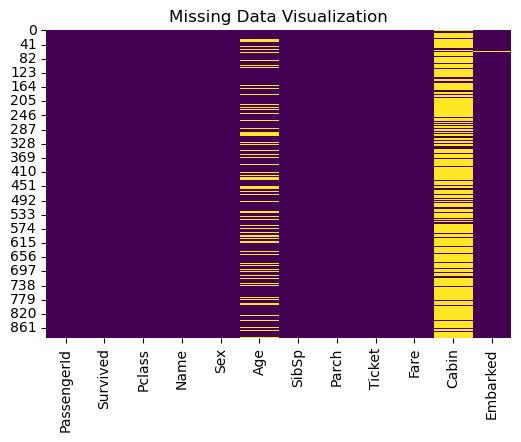

Missing Data Counts:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
missing_data = train_df.isnull().sum()

plt.figure(figsize=(6, 4))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()


print("Missing Data Counts:\n", missing_data)

Bộ dữ liệu có 3 cột chứa giá trị thiếu là "Age"; "Cabin"; "Embarked" trong đó cột "Cabin" chứa nhiều giá trị thiếu nhất tiếp đến đó là "Age" cuối cùng là "Embarked". Và 2 biểu đồ đã trực quan cho thấy các giá trị thiếu rất nhiều, có thể sẽ ảnh hưởng đến việc huấn luyện mô hình.

## 2.3. Xử lý giá trị thiếu

In [11]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [12]:
train_df.drop('Cabin', axis=1, inplace=True)

In [13]:
train_df.drop('Embarked', axis=1, inplace=True)

Xử lý giá trị thiếu sẽ có nhiều cách, ở đây để thay thế giá trị thiểu ở cột "Age" thì ta có để thể điền giá trị trung bình hay median đều được nhưng nên điền giá trị trung vị để có thể ít ảnh hưởng giá trị ngoại lai. Còn cột "Cabin" sẽ không có liên quan đến mục tiêu dự đoán sống sót nên ta có thể lựa chọn bỏ cột này. Cột "Embarked" cũng tương tự như cột "Cabin" ta có thể bỏ nó trong quá trình huấn luyện mô hình, chọn đặc trưng.

In [14]:
train_df.isnull().sum()
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


## 2.4. Thống kê mô tả

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**1. Survived:**

* Trung bình tỉ lệ sống sót là 38,4% -> mất cân bẳng nhãn

**2. Pclass:**

* Trung bình hành khách mua vé hạng 2 và min là 1 nghĩa là có ít người mua vé hạng nhất.

**3. Age:**

* Có độ phân tán lớn → nhiều nhóm tuổi khác nhau.

* Có thể chia thành nhóm tuổi (0–12, 13–19, 20–40, 40+) để dễ khai thác mô hình.

**4. Fare:**

* Có phân bố rất lệch (có người trả cực cao).

* Nên chuẩn hóa để giảm ảnh hưởng cực trị.

In [17]:
train_df['Age'] = train_df['Age'].astype(int)

In [18]:
bins = [0, 12, 19, 35, 60, 100]
labels = ['Trẻ em', 'Thiếu niên', 'Thanh niên', 'Trung niên', 'Cao tuổi']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

# Kiểm tra
print(train_df[['Age', 'AgeGroup']].head(10))

   Age    AgeGroup
0   22  Thanh niên
1   38  Trung niên
2   26  Thanh niên
3   35  Trung niên
4   35  Trung niên
5   28  Thanh niên
6   54  Trung niên
7    2      Trẻ em
8   27  Thanh niên
9   14  Thiếu niên


In [19]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

Cột "SibSp" và "Parch" hai cột này có thể gộp lại tạo thành 1 đặc trưng mới để cho dễ phù hợp tính toán và huấn luyện mô hình.

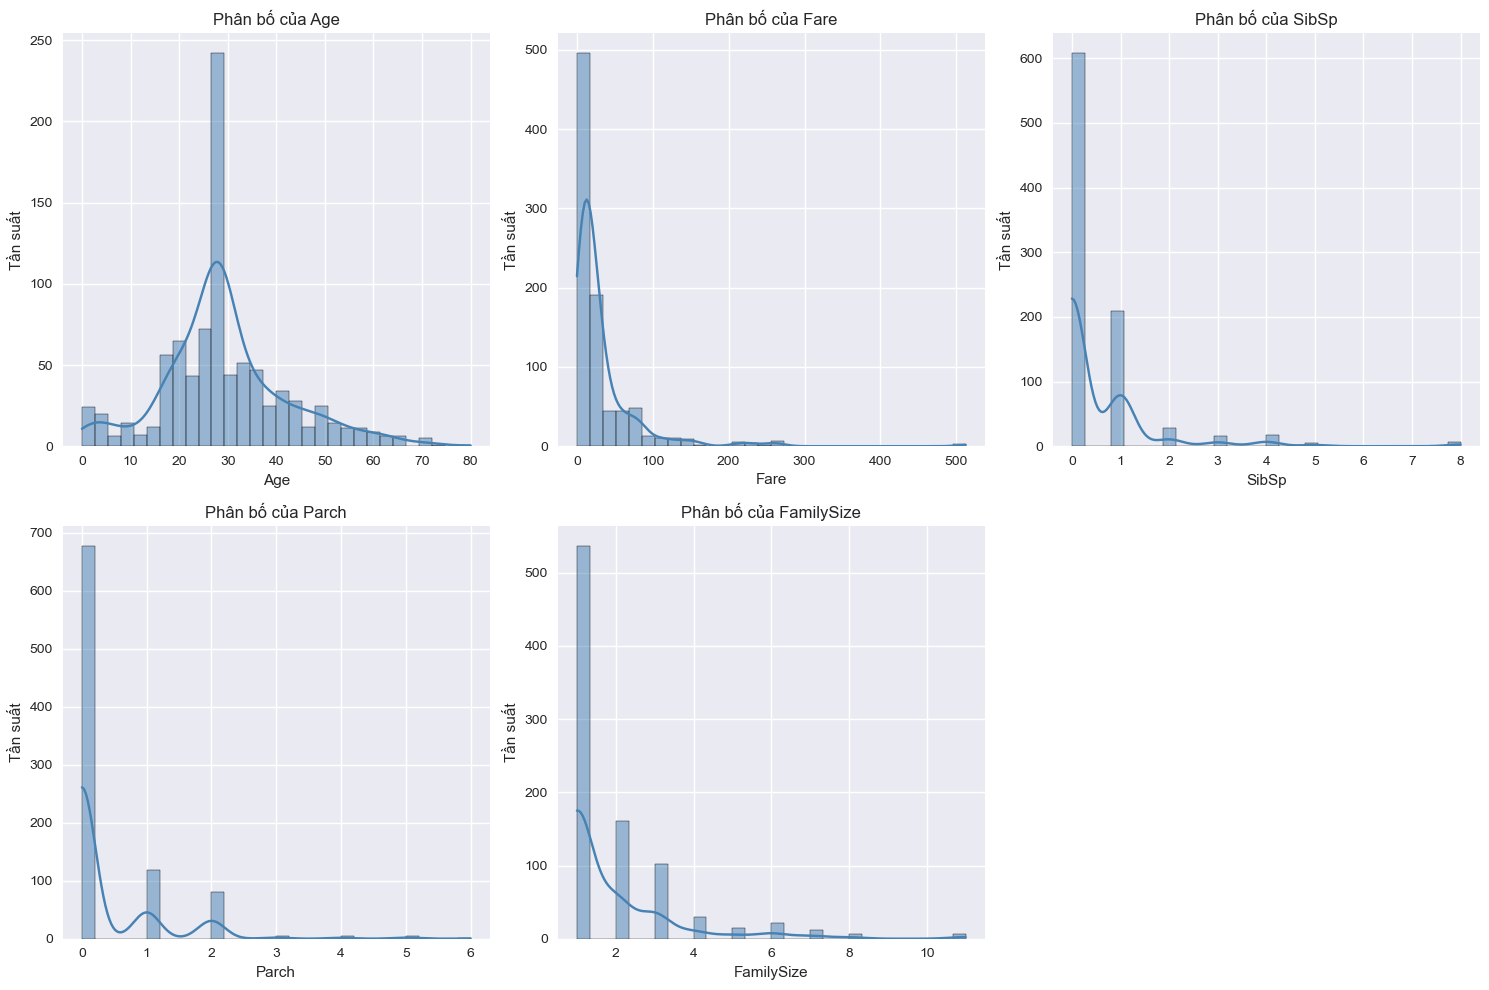

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Các đặc trưng dạng số
num_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[col], bins=30, kde=True, color='steelblue')
    plt.title(f'Phân bố của {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

Đa phần các biểu đồ đều bị lệch phải nhiều, có sự phân bồ không đều

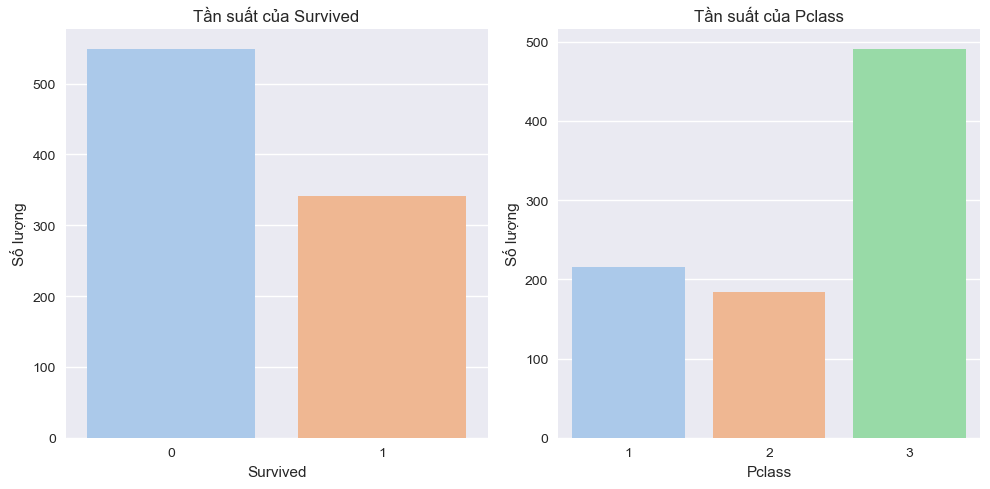

In [23]:
cat_cols = ['Survived', 'Pclass']

plt.figure(figsize=(10, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    sns.countplot(x=col, data=train_df, hue=col, palette='pastel', legend=False)
    plt.title(f'Tần suất của {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

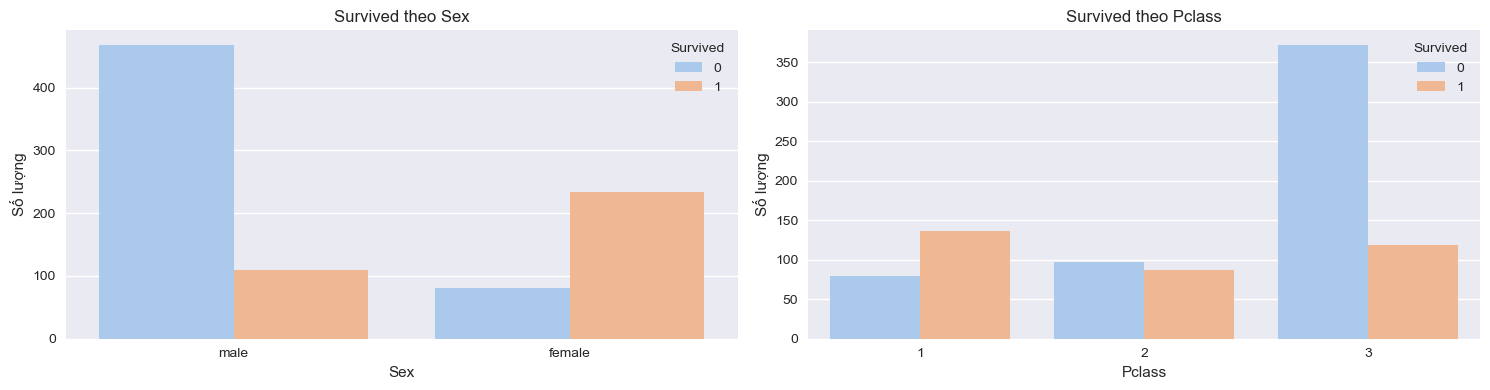

In [25]:
cat_features = ['Sex', 'Pclass']  # các biến phân loại
plt.figure(figsize=(15, 4))

for i, col in enumerate(cat_features, 1):
    plt.subplot(1, len(cat_features), i)
    sns.countplot(data=train_df, x=col, hue='Survived', palette='pastel')
    plt.title(f'Survived theo {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

Tỉ lệ sống sót giữa nam và nữ có sự khác biệt, đa số nam chết nhiều hơn nữ. Có thể ưu tiên cứu trẻ em, phụ nữ và người già. Bên cạnh đó hạng vẽ cũng có sự khác biệt đó là hạng vé hạng 3 thì chết nhiều hơn so với những hạng vé khác. Có sự phân chia giữa các hạng vé(hạng 1 gần boong tàu thuận tiện cho việc cứu hộ, hạng 2 cũng tương tự, hạng 3 hơi xa boong tàu hơn nên có thể dẫn đến việc không kịp thoát nạn). 

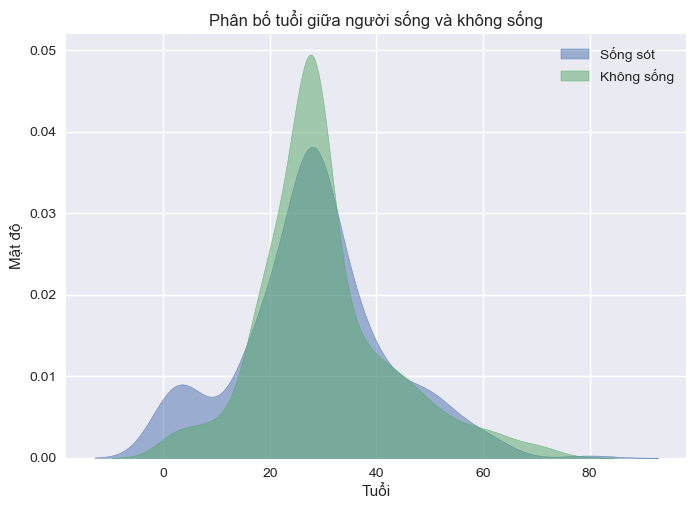

In [28]:
sns.kdeplot(data=train_df[train_df['Survived']==1], x='Age', fill=True, label='Sống sót', alpha=0.5)
sns.kdeplot(data=train_df[train_df['Survived']==0], x='Age', fill=True, label='Không sống', alpha=0.5)
plt.title('Phân bố tuổi giữa người sống và không sống')
plt.xlabel('Tuổi')
plt.ylabel('Mật độ')
plt.legend()
plt.show()

So sánh tỉ lệ sống sót giữa các nhóm tuổi: đa phần những người không sống sót nằm trong khoảng tuổi 20 đến dưới 40.

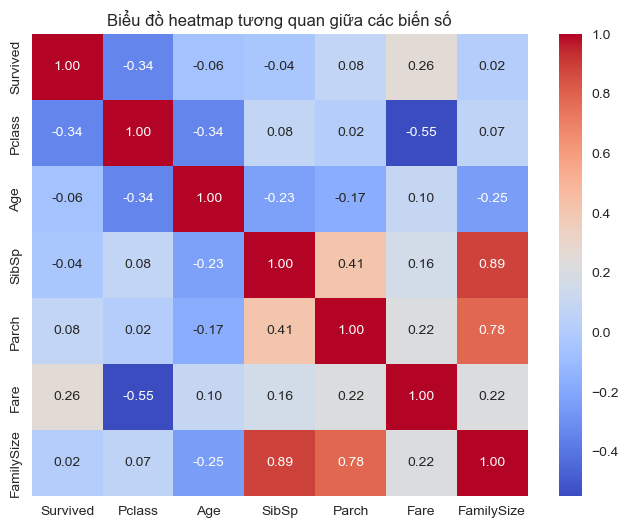

In [35]:
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']

plt.figure(figsize=(8,6))
corr_matrix = train_df[numeric_cols].corr()  # tính ma trận tương quan
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Biểu đồ heatmap tương quan giữa các biến số')
plt.show()

**1. Tương quan với biến Survived (sống sót):**

* Pclass (hạng vé): -0.34 → có tương quan âm vừa phải, nghĩa là vé hạng thấp (Pclass lớn) khả năng sống sót thấp hơn.

* Age (tuổi): -0.06 → gần như không tương quan, tuổi tác ít ảnh hưởng trực tiếp.

* SibSp (số anh/chị/em): -0.04 → gần như không tương quan.

* Parch (số cha/mẹ/con): 0.08 → gần như không tương quan.

* Fare (giá vé): 0.26 → tương quan dương nhẹ, vé đắt hơn, khả năng sống sót cao hơn.

* FamilySize (kích thước gia đình): 0.02 → gần như không tương quan.

Nhận xét: Hạng vé và giá vé là hai yếu tố có ảnh hưởng lớn nhất đến việc sống sót, Có thể dùng Pclass, Fare, Age, và một trong số các biến gia đình (FamilySize hoặc SibSp/Parch).

# 3.LỰA CHỌN ĐẶC TRƯNG

In [36]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})

In [37]:
train_df = pd.get_dummies(train_df, columns=['Pclass'], drop_first=True)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(train_df[['Age', 'Fare', 'FamilySize']])

# 4.HUẤN LUYỆN MÔ HÌNH

In [39]:
X = train_df[['Age', 'Fare', 'FamilySize', 'Sex', 'Pclass_2', 'Pclass_3']]
y = train_df['Survived']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[89 16]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



0.81 → 81% mẫu validation được dự đoán đúng.

Hàng đầu tiên = class 0 (không sống sót)

True Negative = 89 (dự đoán đúng là 0)

False Positive = 16 (dự đoán sống sót nhầm)

Hàng thứ hai = class 1 (sống sót)

False Negative = 18 (dự đoán không sống sót nhầm)

True Positive = 56 (dự đoán đúng là sống sót)

Precision (1) = 0.78 → trong số dự đoán sống sót, 78% là đúng.

Recall (1) = 0.76 → trong số người thật sự sống sót, 76% được dự đoán đúng.

F1-score (1) = 0.77 → kết hợp precision & recall.

Class 0 có hiệu suất nhỉnh hơn → phù hợp với mất cân bằng nhãn (số người không sống sót > số người sống sót).

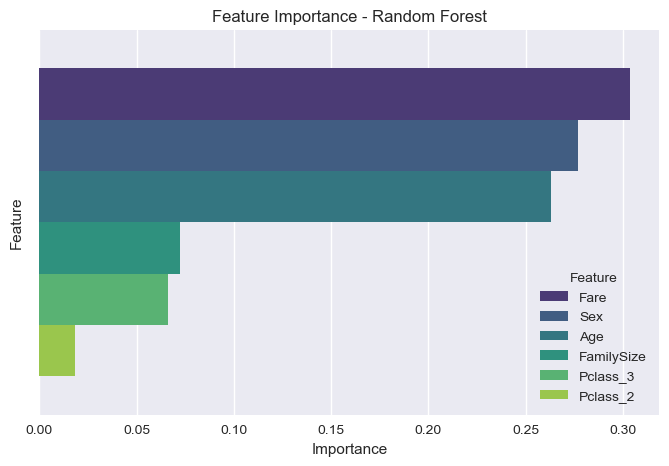

In [45]:
# Lấy feature importance
importances = model.feature_importances_
features = X.columns

# Tạo DataFrame sắp xếp theo importance
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', hue ='Feature', data=feat_imp, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 5. DỰ ĐOÁN CHO TẬP TEST

In [71]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
test_df.duplicated().sum()

np.int64(0)

In [73]:
test_df.isnull().sum().any()
test_df.isna().sum().any()

np.True_

In [74]:
test_df.isnull().sum()
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [75]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [77]:
test_df['Age'] = test_df['Age'].astype(int)

In [83]:
test_df.drop(columns=['Cabin'])

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_2,Pclass_3,FamilySize
0,892,"Kelly, Mr. James",0,34,0,0,330911,7.8292,Q,False,True,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,S,False,True,2
2,894,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,Q,True,False,1
3,895,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,S,False,True,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,S,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",0,27,0,0,A.5. 3236,8.0500,S,False,True,1
414,1306,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108.9000,C,False,False,1
415,1307,"Saether, Mr. Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7.2500,S,False,True,1
416,1308,"Ware, Mr. Frederick",0,27,0,0,359309,8.0500,S,False,True,1


In [82]:
# Tạo biến FamilySize
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [80]:
# Biến phân loại
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})
test_df = pd.get_dummies(test_df, columns=['Pclass'], drop_first=True)

In [84]:
scaler = StandardScaler()
test_df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(test_df[['Age', 'Fare', 'FamilySize']])

In [85]:
X_test = test_df[['Age', 'Fare', 'FamilySize', 'Sex', 'Pclass_2', 'Pclass_3']]

In [86]:
# Dự đoán sống sót
test_df['Survived'] = model.predict(X_test)

In [87]:
submission = test_df[['PassengerId', 'Survived']]
submission.to_csv('submission.csv', index=False)

# Kết thúc